In [32]:
import pandas as pd
import numpy as np

In [117]:
cov_text_df = pd.read_csv('../Datos/Corona_NLP_test.csv', encoding = 'utf8')
display(cov_text_df)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [118]:
cov_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [119]:
cov_text_df = cov_text_df.iloc[:,4:]
cov_text_df.head(5)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [120]:
for text in cov_text_df.OriginalTweet.head():
    print(f"tweet: ", text, '\n')

tweet:  TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1 

tweet:  When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how  #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY 

tweet:  Find out how you can protect yourself and loved ones from #coronavirus. ? 

tweet:  #Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event?

https://t.co/IASiReGPC4

#QAnon #QAnon2018 #QAnon2020 
#Election2020 #CDC https://t.co/29isZOewxu 

tweet:  #toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News  #Corvid19 #7NewsMelb #dunnypapergate #Costco    O

In [121]:
cov_text_df["num_words"] = cov_text_df['OriginalTweet'].apply(lambda x: len(str(x).split()))

print('número máximo de palabras en un tweet:',cov_text_df["num_words"].max())
print('número mínimo de palabras en un tweet:',cov_text_df["num_words"].min())

número máximo de palabras en un tweet: 62
número mínimo de palabras en un tweet: 2


In [122]:
cov_text_df["num_unique_words"] = cov_text_df['OriginalTweet'].apply(lambda x: len(set(str(x).split())))
print('máximo de palabras únicas en un tweet:',cov_text_df['num_unique_words'].max())
print('promedio de palabras únicas por tweet:',cov_text_df['num_unique_words'].mean())

máximo de palabras únicas en un tweet: 52
promedio de palabras únicas por tweet: 30.135071090047393


In [123]:
cov_text_df["num_chars"] = cov_text_df['OriginalTweet'].apply(lambda x: len(str(x)))
print('máximo de caracteres únicos en un tweet:',cov_text_df["num_chars"].max())

máximo de caracteres únicos en un tweet: 342


In [124]:
import string
cov_text_df["num_punctuations"] =cov_text_df['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
print('número máximo de puntuaciones en un tweet:',cov_text_df["num_punctuations"].max())

número máximo de puntuaciones en un tweet: 44


In [125]:
np.unique(cov_text_df['Sentiment'])

array(['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral',
       'Positive'], dtype=object)

In [126]:
labels_dict = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

In [127]:
for index in range(len(cov_text_df)):
    key = cov_text_df.iloc[index]['Sentiment']
    cov_text_df.at[index, 'Sentiment_hot'] = labels_dict[key]
cov_text_df.head(3)

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0


In [128]:
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
def generate_wordcloud(text): 
    wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.margins(x=0, y=0)
    plt.show()

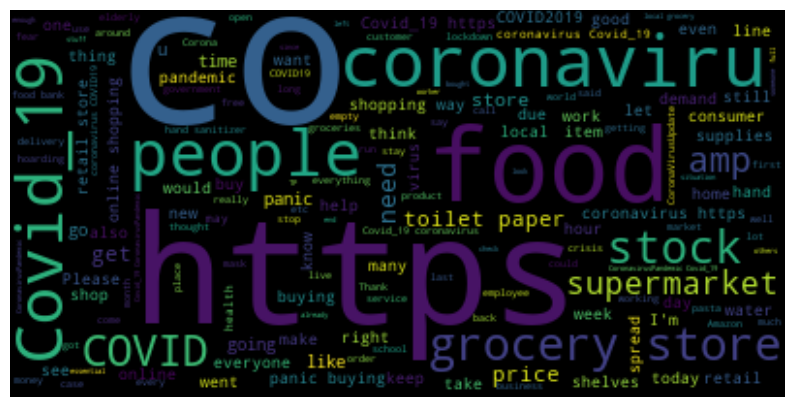

In [153]:
text =" ".join(cov_text_df.OriginalTweet)
generate_wordcloud(text)

In [129]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/thejarmanitor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<AxesSubplot: xlabel='Sentiment_hot', ylabel='num_words'>

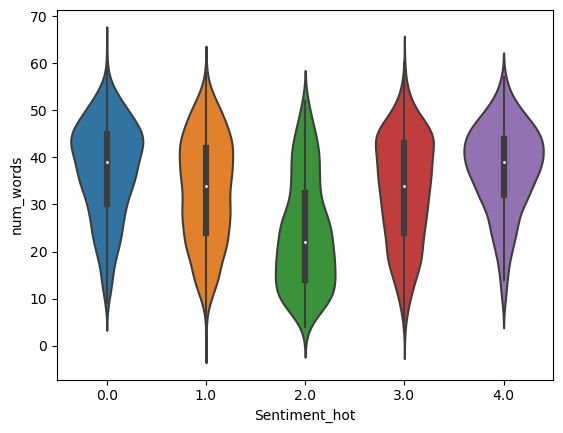

In [130]:
import seaborn as sns

sns.violinplot(data=cov_text_df,x="Sentiment_hot", y="num_words")

In [131]:
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/thejarmanitor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [132]:
main_text = cov_text_df.OriginalTweet[35]
print(main_text)

Remember, with all the media deflection stories about bog rolls, panic-buying, food shortages, Covid-19, Irish bridges etc etc.

We've still got Brexit, Austerity, poverty, a crashing economy &amp; the worst UK Govt in living memory. 

All depressing stuff &amp; it aint gonna end well.


In [133]:
import re

def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

cov_text_df['TweetPunct'] = cov_text_df['OriginalTweet'].apply(lambda x: remove_punct(x))
cov_text_df.head()

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot,TweetPunct
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...
5,Do you remember the last time you paid $2.99 a...,Neutral,35,31,205,12,2.0,Do you remember the last time you paid a gall...
6,Voting in the age of #coronavirus = hand sanit...,Positive,12,12,90,9,3.0,Voting in the age of coronavirus hand sanitiz...
7,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,28,27,214,13,2.0,DrTedros We cant stop COVID without protectin...
8,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,52,46,280,12,0.0,HI TWITTER I am a pharmacist I sell hand sanit...
9,Anyone been in a supermarket over the last few...,Extremely Positive,37,35,238,32,4.0,Anyone been in a supermarket over the last few...


In [134]:
main_text = cov_text_df.TweetPunct[35]
words = word_tokenize(main_text)
print(words)

['Remember', 'with', 'all', 'the', 'media', 'deflection', 'stories', 'about', 'bog', 'rolls', 'panicbuying', 'food', 'shortages', 'Covid', 'Irish', 'bridges', 'etc', 'etc', 'Weve', 'still', 'got', 'Brexit', 'Austerity', 'poverty', 'a', 'crashing', 'economy', 'amp', 'the', 'worst', 'UK', 'Govt', 'in', 'living', 'memory', 'All', 'depressing', 'stuff', 'amp', 'it', 'aint', 'gon', 'na', 'end', 'well']


In [139]:
cov_text_df['TweetTokenized'] = cov_text_df['TweetPunct'].apply(lambda x: word_tokenize(x.lower()))
cov_text_df.head()

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot,TweetPunct,TweetTokenized
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ..."
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav..."


In [136]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(main_text)
wordsFiltered = []
 
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)
 
print(wordsFiltered)

['Remember', 'media', 'deflection', 'stories', 'bog', 'rolls', 'panicbuying', 'food', 'shortages', 'Covid', 'Irish', 'bridges', 'etc', 'etc', 'Weve', 'still', 'got', 'Brexit', 'Austerity', 'poverty', 'crashing', 'economy', 'amp', 'worst', 'UK', 'Govt', 'living', 'memory', 'All', 'depressing', 'stuff', 'amp', 'aint', 'gon', 'na', 'end', 'well']


In [140]:
def remove_stopwords(words, stopwords):
    wordsFiltered = []
    for w in words:
        if w not in stopwords:
            wordsFiltered.append(w)
    return wordsFiltered

cov_text_df['TweetNoStop'] = cov_text_df['TweetTokenized'].apply(lambda x: remove_stopwords(x, stopWords))
cov_text_df.head()

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot,TweetPunct,TweetTokenized,TweetNoStop
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav..."
5,Do you remember the last time you paid $2.99 a...,Neutral,35,31,205,12,2.0,Do you remember the last time you paid a gall...,"[do, you, remember, the, last, time, you, paid...","[remember, last, time, paid, gallon, regular, ..."
6,Voting in the age of #coronavirus = hand sanit...,Positive,12,12,90,9,3.0,Voting in the age of coronavirus hand sanitiz...,"[voting, in, the, age, of, coronavirus, hand, ...","[voting, age, coronavirus, hand, sanitizer, su..."
7,"@DrTedros ""We cant stop #COVID19 without prot...",Neutral,28,27,214,13,2.0,DrTedros We cant stop COVID without protectin...,"[drtedros, we, cant, stop, covid, without, pr...","[drtedros, cant, stop, covid, without, protec..."
8,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative,52,46,280,12,0.0,HI TWITTER I am a pharmacist I sell hand sanit...,"[hi, twitter, i, am, a, pharmacist, i, sell, h...","[hi, twitter, pharmacist, sell, hand, sanitize..."
9,Anyone been in a supermarket over the last few...,Extremely Positive,37,35,238,32,4.0,Anyone been in a supermarket over the last few...,"[anyone, been, in, a, supermarket, over, the, ...","[anyone, supermarket, last, days, went, normal..."


In [143]:
from nltk.stem import PorterStemmer

main_text = cov_text_df.TweetNoStop[35]
ps = PorterStemmer()
 
for word in main_text:
    print(ps.stem(word))

rememb
media
deflect
stori
bog
roll
panicbuy
food
shortag
covid
irish
bridg
etc
etc
weve
still
got
brexit
auster
poverti
crash
economi
amp
worst
uk
govt
live
memori
depress
stuff
amp
aint
gon
na
end
well


In [145]:
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

cov_text_df['TweetStemmed'] = cov_text_df['TweetNoStop'].apply(lambda x: stemming(x))
cov_text_df.head()

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot,TweetPunct,TweetTokenized,TweetNoStop,TweetStemmed
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...","[trend, new, yorker, encount, empti, supermark..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanit, fred, meyer, turn..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]","[find, protect, love, one, coronaviru]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ...","[panic, buy, hit, newyork, citi, anxiou, shopp..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpap, dunnypap, coronaviru, coronavirusa..."


In [150]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/thejarmanitor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/thejarmanitor/nltk_data...


True

In [151]:
from nltk.stem import WordNetLemmatizer

wn = nltk.WordNetLemmatizer()
 
for word in main_text:
    print(wn.lemmatize(word))

remember
medium
deflection
story
bog
roll
panicbuying
food
shortage
covid
irish
bridge
etc
etc
weve
still
got
brexit
austerity
poverty
crashing
economy
amp
worst
uk
govt
living
memory
depressing
stuff
amp
aint
gon
na
end
well


In [152]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

cov_text_df['TweetLemmatized'] = cov_text_df['TweetNoStop'].apply(lambda x: lemmatizer(x))
cov_text_df.head()

,OriginalTweet,Sentiment,num_words,num_unique_words,num_chars,num_punctuations,Sentiment_hot,TweetPunct,TweetTokenized,TweetNoStop,TweetStemmed,TweetLemmatized
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,23,23,228,21,0.0,TRENDING New Yorkers encounter empty supermark...,"[trending, new, yorkers, encounter, empty, sup...","[trending, new, yorkers, encounter, empty, sup...","[trend, new, yorker, encount, empti, supermark...","[trending, new, yorkers, encounter, empty, sup..."
1,When I couldn't find hand sanitizer at Fred Me...,Positive,30,29,193,17,3.0,When I couldnt find hand sanitizer at Fred Mey...,"[when, i, couldnt, find, hand, sanitizer, at, ...","[couldnt, find, hand, sanitizer, fred, meyer, ...","[couldnt, find, hand, sanit, fred, meyer, turn...","[couldnt, find, hand, sanitizer, fred, meyer, ..."
2,Find out how you can protect yourself and love...,Extremely Positive,13,13,73,3,4.0,Find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ...","[find, protect, loved, ones, coronavirus]","[find, protect, love, one, coronaviru]","[find, protect, loved, one, coronavirus]"
3,#Panic buying hits #NewYork City as anxious sh...,Negative,37,37,318,24,1.0,Panic buying hits NewYork City as anxious shop...,"[panic, buying, hits, newyork, city, as, anxio...","[panic, buying, hits, newyork, city, anxious, ...","[panic, buy, hit, newyork, citi, anxiou, shopp...","[panic, buying, hit, newyork, city, anxious, s..."
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,26,24,252,18,2.0,toiletpaper dunnypaper coronavirus coronavirus...,"[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpaper, dunnypaper, coronavirus, coronav...","[toiletpap, dunnypap, coronaviru, coronavirusa...","[toiletpaper, dunnypaper, coronavirus, coronav..."


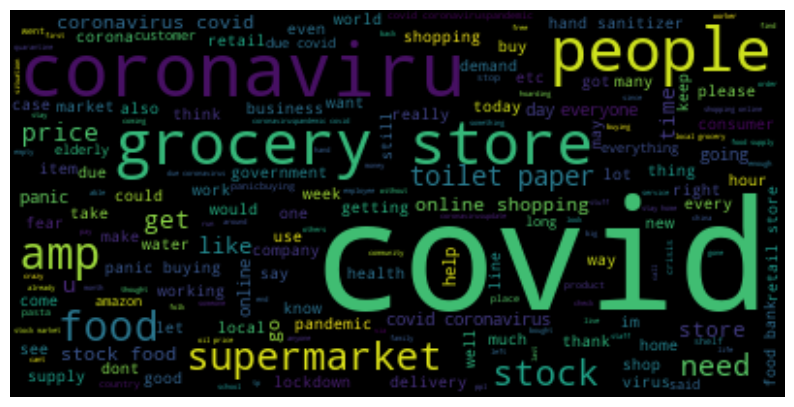

In [163]:
text =" ".join(sum(cov_text_df.TweetLemmatized,[]))
generate_wordcloud(text)

Extremely Negative


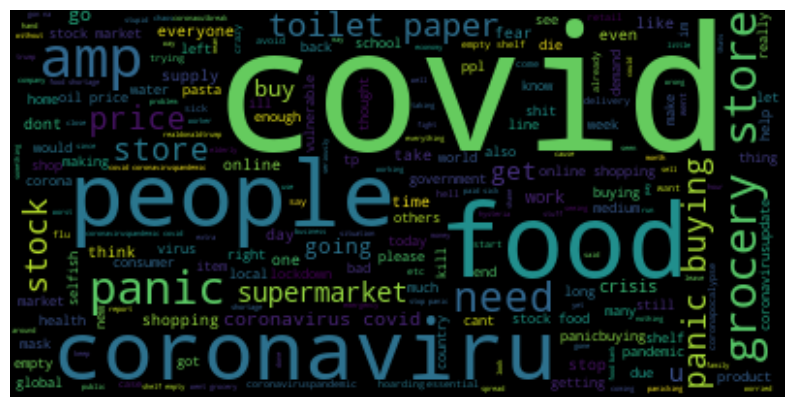

Negative


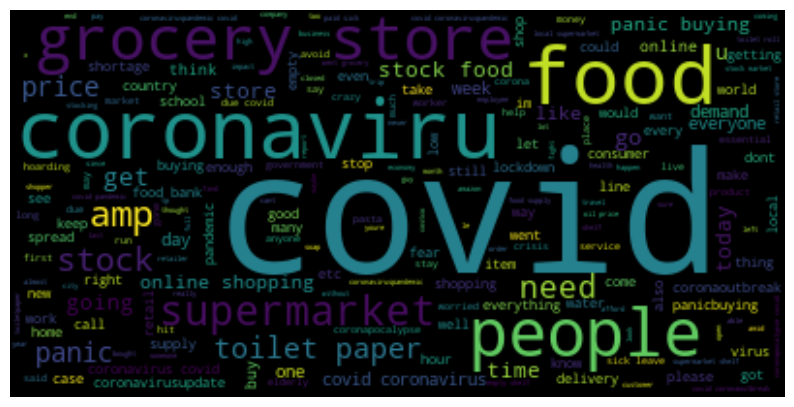

Neutral


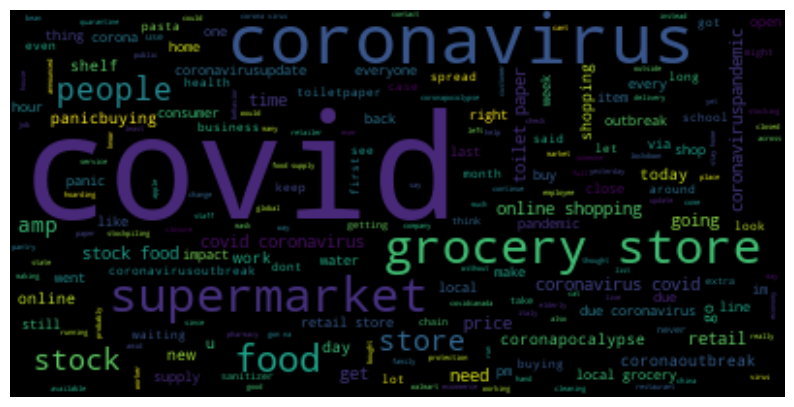

Positive


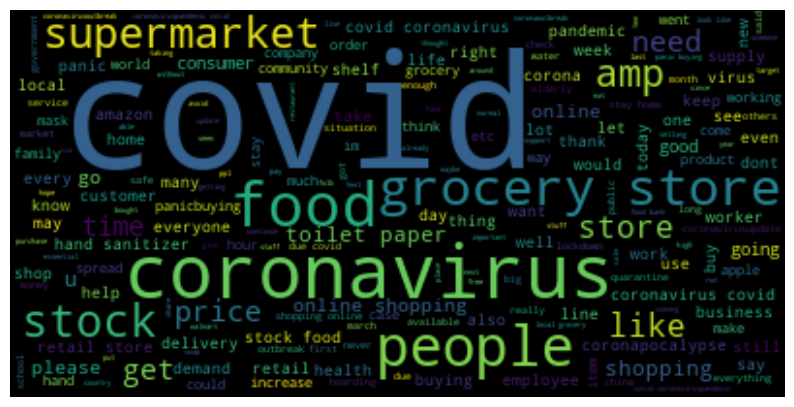

Extremely Positive


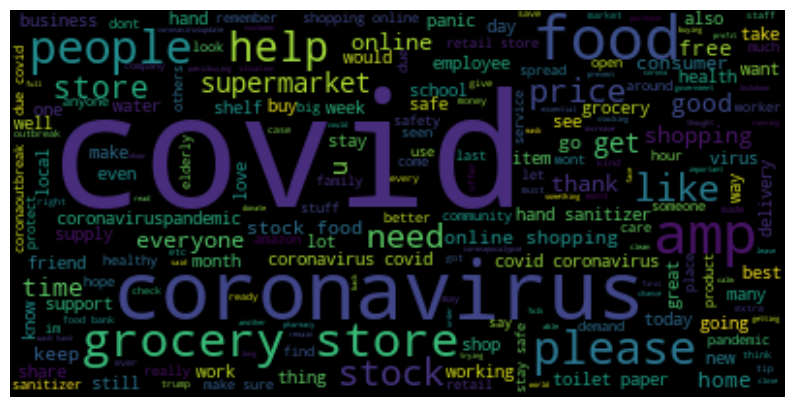

In [166]:
for key in labels_dict.keys():
    print(key)
    text =" ".join(sum(cov_text_df[cov_text_df['Sentiment'] == key].TweetLemmatized,[]))
    generate_wordcloud(text)

In [169]:
from gensim import corpora

mydict = corpora.Dictionary(cov_text_df['TweetLemmatized'])

print("Total unique words:")
print(len(mydict.token2id))

print("\nSample data from dictionary:")
i = 0
# Print top 4 (word, id) tuples
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 3:
        break
    i += 1

Total unique words:
13025

Sample data from dictionary:
Word: brooklyn - ID: 0 
Word: coronavirusfearing - ID: 1 
Word: empty - ID: 2 
Word: encounter - ID: 3 
